# A2: Unsupervised Analysis Project (Team)

Machine Learning - DAT-5303 - BMBAN2<br>
<br>
<strong>Team 5:</strong><br>
Benjamin Gonzalez Garbinski<br> 
Ji Ho Song<br>
Lars Marius Strømberg Jappée<br>

# Executive Summary

There is a present pain point for professional app users in the 30-35 age, given their relatively high practicality versus the presiding 25-30 group. However, this point is specific to their job and melds into the "other apps" categories; the extra study will derive a potential customer base with easy monetization.

The Techies seem to prefer Ipod devices for their big screens. Since they are primarily new users that favor apps on the rise, this would be the perfect target demographic for an app made specifically for iPod users.

Our biggest demographic, the average Joe, is just that, a group that has no tendencies worth mentioning, and until separation presents itself, continuing to do what has been done will suffice.


# introduction

With the data collected from the app survey, we are looking to create separate clusters that we can utilize to create profiles that will make it easier to target them with specialized actions. In addition, the analysis steps have been taken to combine data into characteristics that make it easier to identify and define these groups.

# Imports

In [1]:
# importing packages
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering


# loading data
survey = pd.read_excel('./__datasets/mobile_app_survey_data.xlsx')


# User Defined Functions

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False, axvline = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # adding vertical lines to the visualization
    if axvline != False:
        plt.axvline(x = axvline,
                    color = 'red')
    
    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

# Features

## Renaming

In [3]:
# Renaming columns to make it easier to recognize
survey.columns = ['case_id','age_q1', 'iphone_q2', 'ipod_q2', 'android_q2', 'blackberry_q2', 
         'nokia_q2', 'windows_q2', 'hp_q2', 'tablet_q2', 'other_q2', 'none_q2', 
         'music_sound_q4', 'tv_q4', 'entertainment_q4', 'tv_shows_q4', 
         'gaming_q4', 'some_q4', 'general_news_q4', 'shopping_q4', 
         'specific_news_q4', 'other_q4', 'none_q4', 'nr_apps_q11', 
         'free_pct_q12', 'visits_facebook_q13', 'visits_twitter_q13', 
         'visits_myspace_q13', 'visits_pandora_q13', 'visits_vevo_q13', 
         'visits_youtube_q13', 'visits_aol_q13', 'visits_lastfm_q13', 
         'visits_yahoo_q13', 'visits_imdb_q13', 'visits_linkedin_q13', 
         'visits_netflix_q13','tec_dev_q24', 'tec_advisor_q24','new_gad_q24',
         'much_tec_q24','enjoy_tec_q24','save_time_q24','music_q24','tv_show_q24',
         'much_inf_q24','sns_q24','family_q24','avoid_family_q24','opinion_leader_q25',
         'stand_out_q25','offer_advice_q25','lead_decision_q25','first_new_q25',
         'responsibility_q25','control_q25','risk_taker_q25','creative_q25',
         'optimistic_q25','active_q25','stretched_time_q25','luxury_brand_q26',
         'discount_q26','shopping_q26','package_deal_q26','online_shop_q26',
         'designer_brand_q26','not_enough_app_q26','not_number_app_q26',
         'new_app_q26','child_impact_q26','extra_pay_q26','earning_money_q26',
         'trend_q26','brand_reflect_q26','impulse_purchases_q26','entertainment_q26',
         'education_q48','married_q49','nochild_q50','child<6_q50','child6-12_q50',
         'child13-17_q50','child>18_q50','race_q54','latino_q55','income_q56','gender_q57']

## Feature engineering

To better analyze the findings with demographics, we combined the dummied demographic features into one feature containing the observation value. At the same time, some of the different dummy features will be included in the clusters have also been combined as they relate to similar types of apps.              

In [4]:
# Creating a dummy column 
survey['children_q50'] = 0

# Using itterrows to replace previous column with new column
for index, col in survey.iterrows():
    
    # Conditionals to change the values in the new column
    if survey.loc[index, 'nochild_q50'] == 1:
        survey.loc[index, 'children_q50'] = 'none'
        
    elif survey.loc[index, 'child<6_q50'] == 1:
        survey.loc[index, 'children_q50'] = '<6'

    elif survey.loc[index, 'child6-12_q50'] == 1:
        survey.loc[index, 'children_q50'] = '6-12'   
    
    elif survey.loc[index, 'child13-17_q50'] == 1:
        survey.loc[index, 'children_q50'] = '13-17'
        
    elif survey.loc[index, 'child>18_q50'] == 1:
        survey.loc[index, 'children_q50'] = '>18'
        

# Creating a dummy column 
survey['device'] = 0

# Using itterrows to replace previous column with new column
for index, col in survey.iterrows():
    
    # Conditionals to change the values in the new column
    if survey.loc[index, 'iphone_q2'] == 1:
        survey.loc[index, 'device'] = 'iphone'
        
    elif survey.loc[index, 'ipod_q2'] == 1:
        survey.loc[index, 'device'] = 'ipod'

    elif survey.loc[index, 'android_q2'] == 1:
        survey.loc[index, 'device'] = 'android'   
    
    elif survey.loc[index, 'blackberry_q2'] == 1:
        survey.loc[index, 'device'] = 'blackberry'

    elif survey.loc[index, 'nokia_q2'] == 1:
        survey.loc[index, 'device'] = 'nokia'   
        
    elif survey.loc[index, 'windows_q2'] == 1:
        survey.loc[index, 'device'] = 'windows'

    elif survey.loc[index, 'hp_q2'] == 1:
        survey.loc[index, 'device'] = 'hp'   
        
    elif survey.loc[index, 'tablet_q2'] == 1:
        survey.loc[index, 'device'] = 'tablet'   
        
    elif survey.loc[index, 'other_q2'] == 1:
        survey.loc[index, 'device'] = 'other'

    elif survey.loc[index, 'none_q2'] == 1:
        survey.loc[index, 'device'] = 'none'         
        
# Combining similar apps to fewer variations

# Creating a dummy column 
survey['tv_entertainment_q4'] = 0

# Using itterrows to replace previous column with new column
for index, col in survey.iterrows():
    
    # Conditionals to change the values in the new column, combining features
    if survey.loc[index, 'tv_q4'] == 1:
        survey.loc[index, 'tv_entertainment_q4'] = 1
        
    elif survey.loc[index, 'entertainment_q4'] == 1:
        survey.loc[index, 'tv_entertainment_q4'] = 1

    elif survey.loc[index, 'tv_shows_q4'] == 1:
        survey.loc[index, 'tv_entertainment_q4'] = 1  
    

# Creating a dummy column 
survey['news_q4'] = 0

# Using itterrows to replace previous column with new column, combining features
for index, col in survey.iterrows():
    
    # Conditionals to change the values in the new column
    if survey.loc[index, 'general_news_q4'] == 1:
        survey.loc[index, 'news_q4'] = 1
        
    elif survey.loc[index, 'specific_news_q4'] == 1:
        survey.loc[index, 'news_q4'] = 1


## Categorizing

In [5]:
# demographics 
demographics = ['age_q1', 'education_q48', 'married_q49', 'children_q50', 
                'race_q54', 'latino_q55', 'income_q56', 'gender_q57', 'device']

# device 
device = survey['device'] 

# categorical dummies
dummies = ['music_sound_q4', 'tv_entertainment_q4' ,'gaming_q4',
            'some_q4','shopping_q4', 'news_q4','other_q4',
            'none_q4']

# behaviour/actions
behaviour = ['nr_apps_q11','free_pct_q12','visits_facebook_q13',
             'visits_twitter_q13','visits_myspace_q13','visits_pandora_q13',
             'visits_vevo_q13','visits_youtube_q13','visits_aol_q13',
             'visits_lastfm_q13','visits_yahoo_q13','visits_imdb_q13',
             'visits_linkedin_q13','visits_netflix_q13' ]

# likert scale questions divided by indivual questions
q24 = ['tec_dev_q24','tec_advisor_q24','new_gad_q24','much_tec_q24','enjoy_tec_q24',
         'save_time_q24','music_q24','tv_show_q24','much_inf_q24','sns_q24',
         'family_q24','avoid_family_q24']

q25 = ['opinion_leader_q25','stand_out_q25',
         'offer_advice_q25','lead_decision_q25','first_new_q25',
         'responsibility_q25','control_q25','risk_taker_q25','creative_q25',
         'optimistic_q25','active_q25','stretched_time_q25']


q26 = ['luxury_brand_q26',
         'discount_q26','shopping_q26','package_deal_q26','online_shop_q26',
         'designer_brand_q26','not_enough_app_q26','not_number_app_q26','new_app_q26',
         'child_impact_q26','extra_pay_q26','earning_money_q26','trend_q26',
         'brand_reflect_q26','impulse_purchases_q26','entertainment_q26']

# combined all likert
psychometrics = q24 + q25 + q26


# Psychometrics

## Scaling

We scale on both the variables across and features due to differences created by people's response routines. For example, people tend to answer more extremely or moderately in all questions, like strongly agree or agree softly consequently.

In [6]:
# creating lists for values to keep
psychometrics = survey[psychometrics]

keep1 = []
for value in psychometrics:
    keep1.append(value)
    
# setting dataframe to transpose and scale 
psychometrics = survey[keep1]

# transposing dataframe to scale user responses 
psychometrics = psychometrics.transpose()

# applying the unsupervised_scaler function
psychometrics_scaled = unsupervised_scaler(df = psychometrics)

# transposing dataframes back to original structure
psychometrics_scaled = psychometrics_scaled.transpose()
psychometrics = psychometrics.transpose()

# applying the unsupervised_scaler function
psychometrics_scaled = unsupervised_scaler(df = psychometrics_scaled)

## PCA Model

Each principal component did not group too many of the observations. While this shows that we might have tried different combinations, we could also see that we could use the major ones, cutting it off at the first minor change in size, first elbow.

In [7]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
survey_pca = pca.fit_transform(psychometrics_scaled)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.092
PC 2: 0.066
PC 3: 0.063
PC 4: 0.044
PC 5: 0.037
PC 6: 0.033
PC 7: 0.032
PC 8: 0.031
PC 9: 0.029
PC 10: 0.028
PC 11: 0.026
PC 12: 0.025
PC 13: 0.025
PC 14: 0.024
PC 15: 0.024
PC 16: 0.023
PC 17: 0.022
PC 18: 0.022
PC 19: 0.021
PC 20: 0.021
PC 21: 0.021
PC 22: 0.02
PC 23: 0.02
PC 24: 0.019
PC 25: 0.018
PC 26: 0.018
PC 27: 0.018
PC 28: 0.017
PC 29: 0.017
PC 30: 0.017
PC 31: 0.016
PC 32: 0.016
PC 33: 0.016
PC 34: 0.015
PC 35: 0.015
PC 36: 0.014
PC 37: 0.013
PC 38: 0.013
PC 39: 0.012
PC 40: 0.0


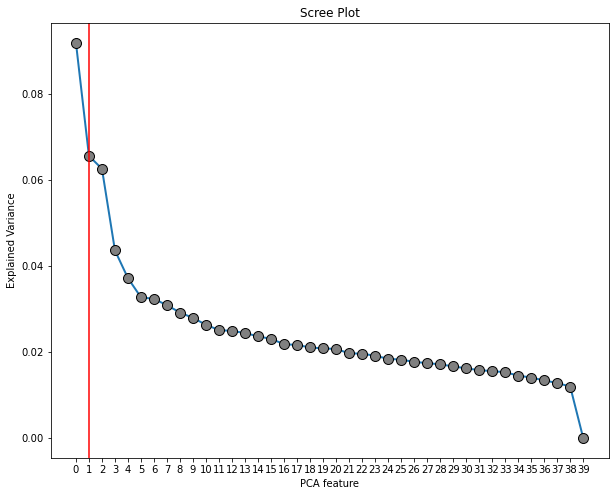

In [8]:
# Checking for elbow and marking with a red line where to cut off
scree_plot(pca_object = pca,
          export = False,
          axvline = 1)

## Interpreting Principal Components

We divided our behaviors PCA into two categories:

Practical-Leader_Follower:

Practical-Leader side:
On one side of the spectrum, we find those who do not like to spend money on things like brand, package deals, following trends, or using social media but are considered by those that surround them as both tech advisors and opinion leaders. This side also finds that responsibility heavy but worthwhile since it saves them and their loved ones time. Overall good influencer but good at frugal spending.

Follower side:
On the other side of the spectrum follows the opposite personality, the impulse buyer, the brand follower, and the not-so-savvy opinion, which tends not to be heard. An overall lousy influencer that is bad at frugality.

When looking at how the people with these characteristics answered, we can see that they are at the forefront of technology in their family even though they might not like it. They are comfortable with technology and believe it will better their lives. While all of this could lead to them being leaders on the technology front. They are not prone to extroverted characteristics and might keep more to themselves, enjoying technology's benefits. For this analysis, let's call them introverted tech enthusiasts.
 
On the other side, we then have the outgoing characteristics that do not enjoy technology to the same extent, the non the savvy extroverts.


In [9]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(psychometrics.columns)


In [10]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2,
            random_state = 219)

# FITTING and TRANSFORMING the purchases_scaled
survey_pca_2 = pca_2.fit_transform(psychometrics_scaled)

# transposing pca components
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(psychometrics.columns)

# naming each principal component
factor_loadings_2.columns = ['<follower--practical_leader>','<scpetic--app_entusiast>']

factor_loadings_2

,<follower--practical_leader>,<scpetic--app_entusiast>
tec_dev_q24,-0.06,-0.07
tec_advisor_q24,0.22,0.17
new_gad_q24,0.07,0.19
much_tec_q24,-0.05,-0.22
enjoy_tec_q24,-0.03,0.15
save_time_q24,0.19,0.10
music_q24,0.19,0.23
tv_show_q24,0.22,0.26
much_inf_q24,-0.07,-0.28
sns_q24,0.19,0.28


## Customer-level PCs

In [11]:
# analyzing factor strengths per customer
factor_loadings = pca_2.transform(psychometrics_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)

factor_loadings_df.columns = factor_loadings_2.columns

# Behaviour

## Scaling

In [12]:
keep2 = []
for value in behaviour:
    keep2.append(value)

# dropping demographic information
behaviour = survey[keep2]

# applying the unsupervised_scaler function
behaviour_scaled = unsupervised_scaler(df = behaviour)


## PCA

For the behavioral actions PCA we found a large grouping in the first PC dropping significantly for the second PC. Therefore we decided only to use the first two as they captured more than 40% of the variance in the data.

In [13]:
# INSTANTIATING a PCA object with no limit to principal components
pca_behaviour = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
behaviour_pca = pca_behaviour.fit_transform(behaviour)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca_behaviour.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")


PC 1: 0.303
PC 2: 0.108
PC 3: 0.092
PC 4: 0.075
PC 5: 0.064
PC 6: 0.061
PC 7: 0.051
PC 8: 0.05
PC 9: 0.046
PC 10: 0.04
PC 11: 0.034
PC 12: 0.027
PC 13: 0.027
PC 14: 0.023


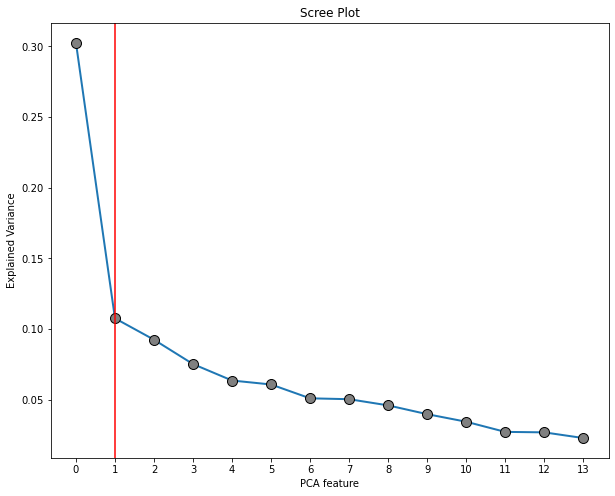

In [14]:
# Checking for elbow and marking with a red line the cut off
scree_plot(pca_object = pca_behaviour,
          export = False,
          axvline = 1)

## Interpreting Principal Components

entertainment - practical

Analyzing the components making up the first PC shows an inclination towards using their phone less for entertainment purposes. While they have about the same amount of apps as average, they have some more paid apps, showing that they tend to go for the app performing a task and might be willing to pay for it. They also offer less inclination towards the entertainment apps listed, including everything from music, tv, and social media. This is the Practical user.
 
On the other hand, we then get the opposite, which has more apps, and a higher share of their app usage comes from social media, music and general entertainment apps listed. These people also might be people that use their phones more. This component we have called the entertainment seeker.

new users - old users

The feature of the second PC seems to influence when they have started to use a smartphone. New users have fewer applications, and they downloaded an application for using unique services such as Netflix, Pandora, IMBD, and YouTube. Also, they prefer Facebook more than other SNS. They don't often use old platforms.
On the other hand, old smartphone users use their devices for more practical reasons. They don't use entertainment applications such as video streaming services. Instead, they use a smartphone to earn news and email services. 


In [15]:
# transposing pca components
factor_loadings_df_behaviour = pd.DataFrame(np.transpose(pca_behaviour.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_df_behaviour = factor_loadings_df_behaviour.set_index(behaviour_scaled.columns)


In [16]:
# INSTANTIATING a new model using the first three principal components
pca_b = PCA(n_components = 2,
            random_state = 219)

# FITTING and TRANSFORMING the purchases_scaled
survey_pca_b = pca_b.fit_transform(behaviour_scaled)

# transposing pca components
factor_loadings_b = pd.DataFrame(np.transpose(pca_b.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_b = factor_loadings_b.set_index(behaviour_scaled.columns)

# naming each principal component
factor_loadings_b.columns = ['<entertainment--practical>','<old_user--new_user>']

factor_loadings_b

,<entertainment--practical>,<old_user--new_user>
nr_apps_q11,0.02,-0.49
free_pct_q12,-0.16,-0.17
visits_facebook_q13,-0.11,0.36
visits_twitter_q13,-0.30,0.04
visits_myspace_q13,-0.34,-0.27
visits_pandora_q13,-0.22,0.33
visits_vevo_q13,-0.33,-0.02
visits_youtube_q13,-0.21,0.25
visits_aol_q13,-0.36,-0.26
visits_lastfm_q13,-0.37,-0.08


## Customer-level PCs

In [17]:
# analyzing factor strengths per customer
factor_loadings_behaviour = pca_b.transform(behaviour_scaled)

# converting to a DataFrame
factor_loadings_behaviour_df = pd.DataFrame(factor_loadings_behaviour)

factor_loadings_behaviour_df.columns = factor_loadings_b.columns

# Clustering

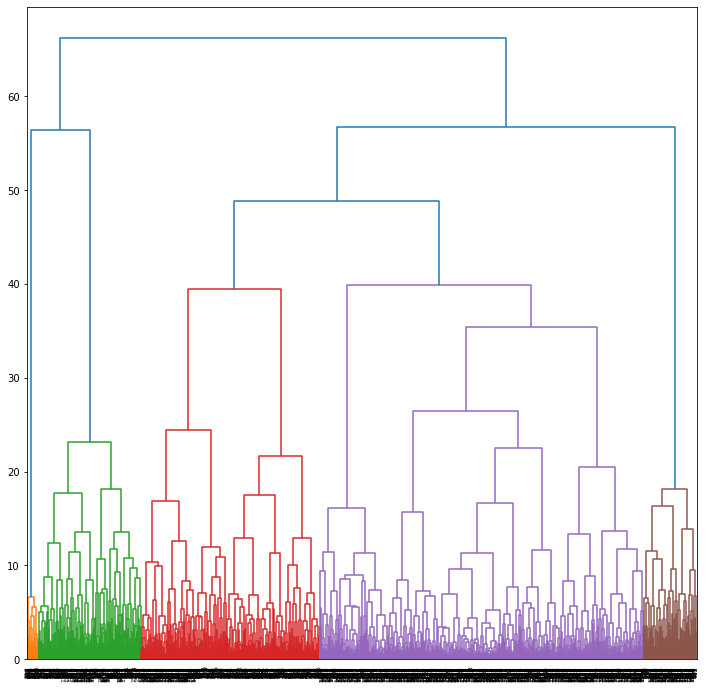

In [18]:
dummies_df = survey[dummies]

scaled = [factor_loadings_df, factor_loadings_behaviour_df, dummies_df]

scaled_df = pd.concat(scaled, axis = 1)

# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = scaled_df)

# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

## Deciding Clusters

'Average Joe':
The Average Joe Cluster has been named so in due to his opposite inclination towards several more extreme psychometrics and actions. They, in general, do not use many of the newest apps, while they do use their device quite a bit for apps. And in general, do not give advice or have any particular opinion towards tech. While we name this average Joe for their lack of pronounced variables, they might also be seen as our average user, someone we do not need to offer too much focus to until they enter a pronounced cluster that we can target with more specialized actions.


'Techie':
This profile represents our second most significant cluster and is characterized by a big influx of new users who appreciate a lot of the convenience that their phone brings to their lives. They are considered tech advisors but are not opinion leaders. They mostly use their phone as a secondary source for information and convenience.


'Professional':
The Professional is the third-largest cluster. They don't have an interest in entertainment applications such as TV, gaming, shopping, and even music. The biggest thing affecting their decision seems to use of practical applications to improve their productivity. However, their behavior would be decided by the company policy rather than their personal preference.

'None':

When we divided our profiles, a fourth one came to light but behaved strangely regarding other profiles. When double-checked, we discovered that clustering had pruned all non-respondents into the same group. We chose to ignore this profile given its nature and small composition.


In [19]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
kmeans_pca = pd.DataFrame({'cluster': customers_k_pca.labels_})


# checking the results
print(kmeans_pca.iloc[: , 0].value_counts())

0    874
1    528
2    123
3     27
Name: cluster, dtype: int64


## Analysing Clusters


In [20]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = scaled_df.columns


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,<follower--practical_leader>,<scpetic--app_entusiast>,<entertainment--practical>,<old_user--new_user>,music_sound_q4,tv_entertainment_q4,gaming_q4,some_q4,shopping_q4,news_q4,other_q4,none_q4
0,-0.09,-0.31,0.22,-0.42,0.37,0.36,0.31,0.43,0.38,0.34,-0.29,-0.13
1,0.19,0.46,-0.27,0.64,-0.57,-0.47,-0.36,-0.59,-0.58,-0.49,-0.29,-0.13
2,-0.23,0.02,-0.19,-0.01,0.13,-0.30,-0.27,-0.04,-0.02,-0.04,3.41,-0.13
3,0.19,0.88,-0.98,1.24,-1.51,-1.13,-1.80,-2.09,-0.95,-1.26,-0.29,7.52


## Creating and Renaming Dataframe

In [21]:
# setting names for columns in dataframe
new_names = survey[demographics].columns.append(kmeans_pca.columns).append(scaled_df.columns)

# concatinating cluster behaviour with principal components
clst_pca_df = pd.concat([kmeans_pca,
                          scaled_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , demographics],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = new_names


In [22]:
# renaming Age
age_names = {1 : '> 18',
             2 : '18-24',
             3 : '25-29',
             4 : '30-34',
             5 : '35-39',
             6 : '40-44',
             7 : '45-49',
             8 : '50-54',
             9 : '55-59',
             10 : '60-64',
             11 : '65 <'}


final_pca_clust_df['age_q1'].replace(age_names, inplace = True)


# renaming education
education_names = {1 : 'Some high school',
             2 : 'High school graduate',
             3 : 'Some college',
             4 : 'College graduate',
             5 : 'Some post-graduate studies',
             6 : 'Post graduate degree'}


final_pca_clust_df['education_q48'].replace(education_names, inplace = True)

                   
# renaming married
married_names = {1 : 'Married',
                 2 : 'Single',
                 3 : 'Single with a partner',
                 4 : 'Separated/Widowed/Divorced'}

final_pca_clust_df['married_q49'].replace(married_names, inplace = True)

   
                             
# renaming race
race_names = {1 : 'White or Caucasian',
             2 : 'Black or African American',
             3 : 'Asian',
             4 : 'Native Hawaiian or Other Pacific Islander',
             5 : 'American Indian or Alaska Native',
             6 : 'Other race'}

final_pca_clust_df['race_q54'].replace(race_names, inplace = True)


# renaming hispanic/latino
latino_names = {1 : 'Hispanic or Latino',
                2 : 'Not Hispanic or Latino'}


final_pca_clust_df['latino_q55'].replace(latino_names, inplace = True)
         
              
# renaming clusters
cluster_names = {0 : 'Average Joe',
                 1 : 'Techie',
                 2 : 'Professional',
                 3 : 'None'}


final_pca_clust_df['cluster'].replace(cluster_names, inplace = True)



# renaming age
income_names = {1 : '<$10,000',
                 2 : '10,000-$14,999',
                 3 : '15,000-$19,999',
                 4 : '20,000-$29,999',
                 5 : '30,000-$39,999',
                 6 : '40,000-$49,999',
                 7 : '50,000-$59,999',
                 8 : '60,000-$69,999',
                 9 : '70,000-$79,999',
                 10 : '80,000-$89,999',
                 11 : '90,000-$99,999',
                 12 : '100,000-$124,999',
                 13 : '125,000-$149,999',
                 14 : '150,000<'}

final_pca_clust_df['income_q56'].replace(income_names, inplace = True)


# renaming gender
gender_names = {1 : 'male',
                2 : 'female'}


final_pca_clust_df['gender_q57'].replace(gender_names, inplace = True)
     

# adding a productivity step
data_df = final_pca_clust_df


# Analyze with Demographics

Professionals with education in the practical-entertainment scale:
When comparing educational demographic data with our profile of professionals, we expected to have little to no representatives in the less than high school education, which was confirmed within the data. While professional users still fall under what we call "entertainment apps," given that linked-in/email providers and video apps are included, it is what we expect a "work phone" to have.

Professionals with age in the practical-entertainment scale:

When comparing professionals to other profiles, we expected a more practical approach to app usage, but that seems to be lost in the "other apps" category. Still, by comparing the 25-30 vs. 30-35 age demographic, we found a pronounced difference that indicates a possible pain point/ opportunity to be addressed.

Average Joe with everything:

When comparing our profile of Average Joe, we tried to find any discerning features it might have. Still, as expected from our name, this profile is just a potpourri of every single type of client that has no extreme values to derive and therefore no strategy besides waiting to see if on a later date they split into a more pronounced group.

Techies with devices:

When comparing techies with other mobile profiles, we found out that they have a bigger preference for Ipod than other profiles. Given they are highly correlated with new users, this is a ripe demographic for the taking.


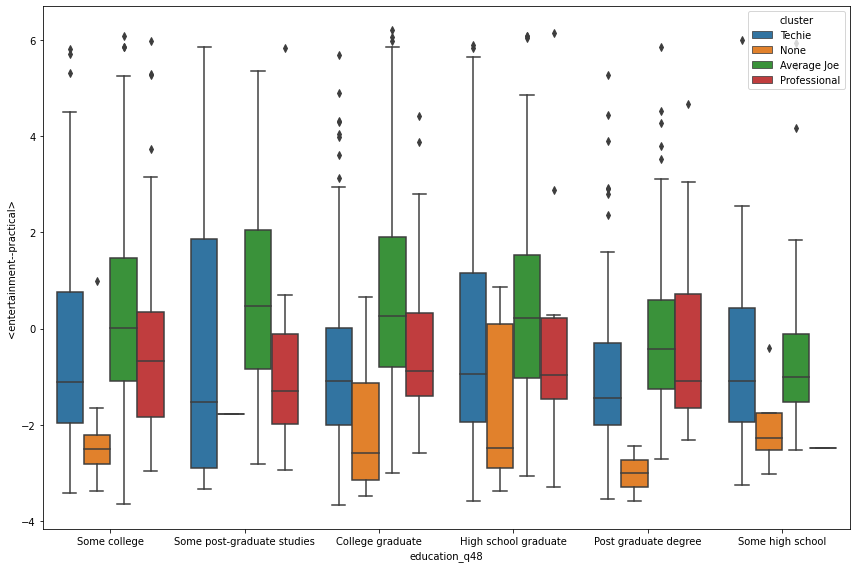

In [23]:
# professional
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'education_q48',
            y = '<entertainment--practical>',
            hue = 'cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

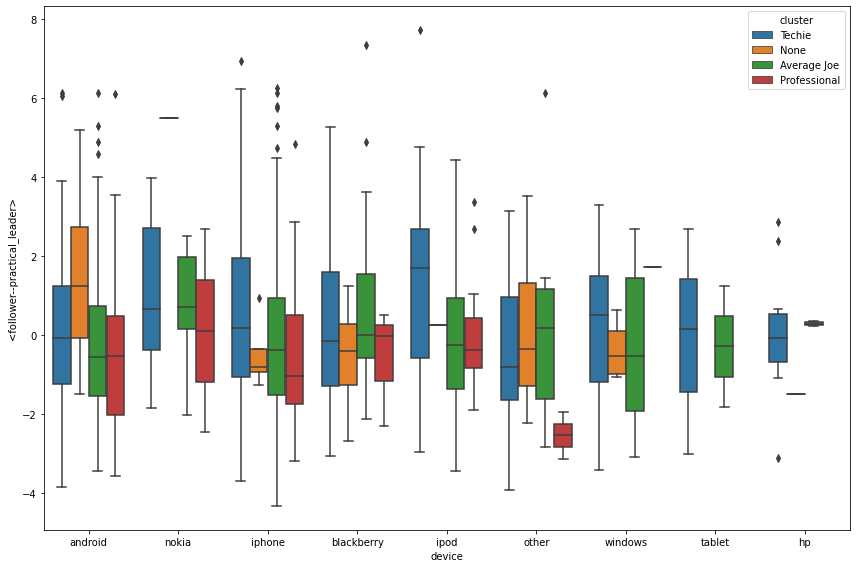

In [24]:
# 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'device',
            y = '<follower--practical_leader>',
            hue = 'cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()